# Millennium Simulation Data Consistency Check: Overlaying Foreground galaxies on Ray-traced Shear and Convergence Maps

We must make sure that our galaxy/halo catalogs are read in correctly before we try and use them. In this demo we make plots of the ray-traced convergence and shear fields, and then overlay the associated foreground galaxies, sized by their stellar mass.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy as sp
import os,sys
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Pangloss:
PANGLOSS_DIR = os.path.expandvars("$PANGLOSS_DIR")
sys.path.append(PANGLOSS_DIR)
import pangloss

In [6]:
K = pangloss.Kappamap(PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa',FITS=False)

In [7]:
S = pangloss.Shearmap([PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_1',PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_2'],FITS=False)

In [11]:
config = pangloss.Configuration(PANGLOSS_DIR+'/example/example.config')
F = pangloss.ForegroundCatalog(PANGLOSS_DIR+'/data/GGL_los_8_0_0_0_0_N_4096_ang_4_Guo_galaxies_on_plane_27_to_63.images.txt',config)

Now we have all the data we need, let's plot the maps and overlay the galaxies - first on the whole catalog, and then in a couple of zoomed-in views.

For some reason these plots are now coming out blank - the values look OK, but something is wrong...

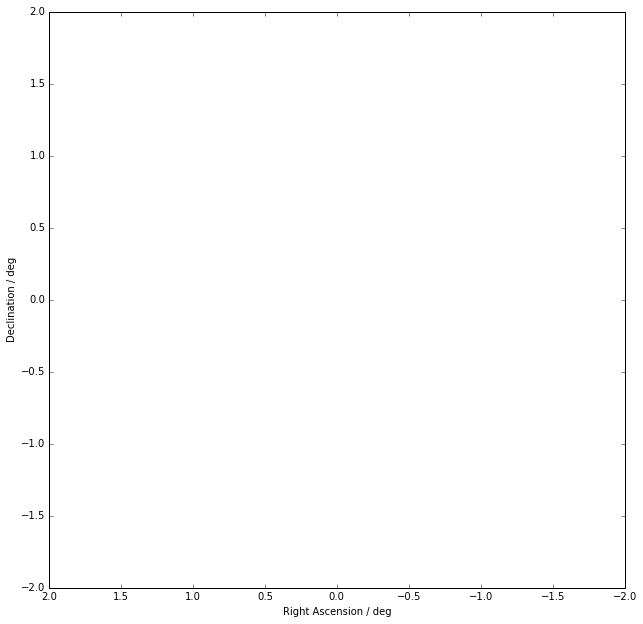

In [14]:
K.plot()
# S.plot()

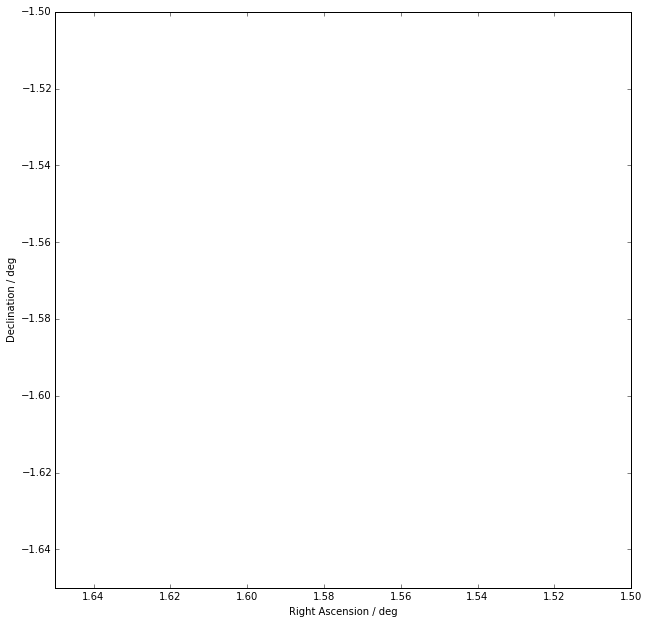

In [15]:
K.plot(subplot=[1.65,1.5,-1.65,-1.5])
# S.plot(fig_size=15,subplot=[1.65,1.5,-1.65,-1.5])
# F.plot(mass_cutoff=[10**11,10**12])

## Scratch pad

In [10]:
mag_cutoff = 21.5
nra = -np.rad2deg(cat.data['nRA'][cat.data['mag']<mag_cutoff])
dec = np.rad2deg(cat.data['Dec'][cat.data['mag']<mag_cutoff])

pix_nra = [K.world2image(a,0)[0] for a in nra]
pix_dec = [K.world2image(0,d)[1] for d in dec]

mags = cat.data['mag'][cat.data['mag']<mag_cutoff]
size = [500/i for i in mags]

NameError: name 'cat' is not defined

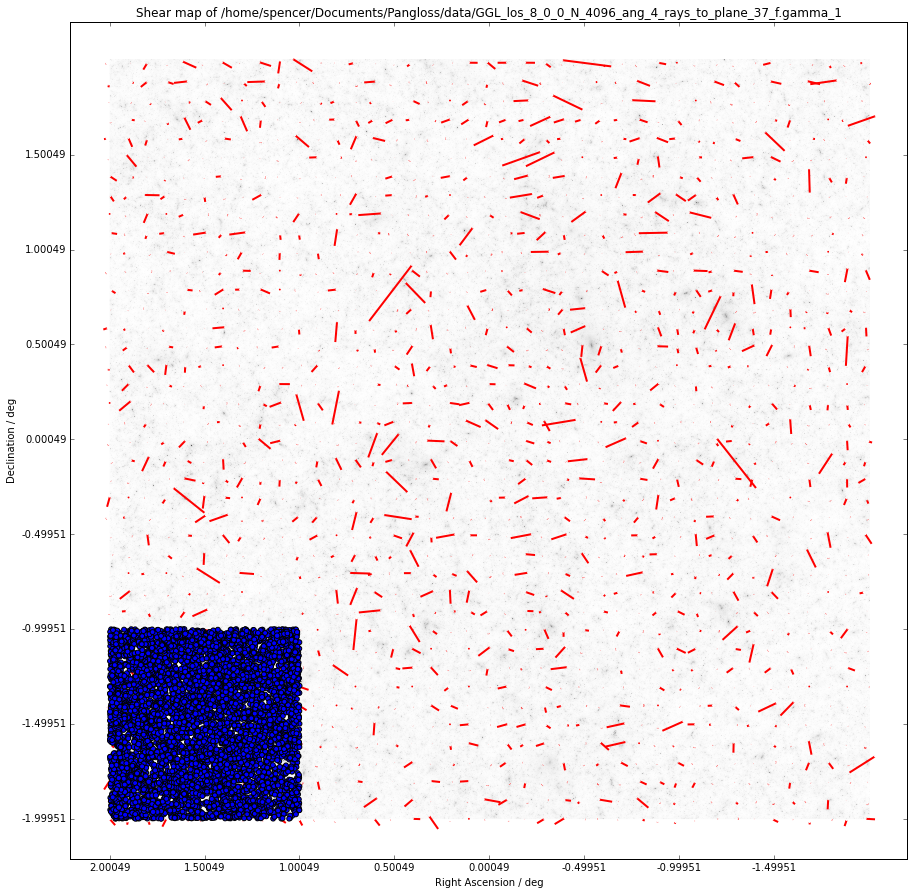

In [20]:
K.plot(15)
S.plot(15)
plt.scatter(pix_nra,pix_dec,s=size)

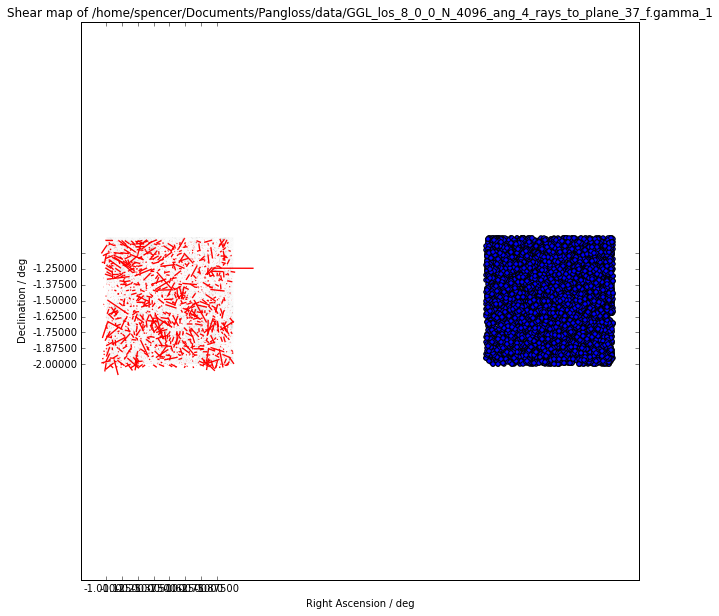

In [22]:
K.plot(10,[-1,-2,-2,-1])
S.plot(10,[-1,-2,-2,-1])

mag_cutoff = 21.5
nra = np.rad2deg(cat.data['nRA'][cat.data['mag']<mag_cutoff])
dec = np.rad2deg(cat.data['Dec'][cat.data['mag']<mag_cutoff])

pix_nra = [K.world2image(a,0)[0] for a in nra]
pix_dec = [K.world2image(0,d)[1] for d in dec]

plt.scatter(pix_nra,pix_dec)

In [23]:
cat.data.colnames

['GalID',
 'HaloID',
 'SubhaloID',
 'Type',
 'PlaneNumber',
 'z_obs',
 'nRA',
 'Dec',
 'Dc_los[Mpc/h]',
 'M_Halo[M_sol/h]',
 'Mhalo_obs',
 'Mstar_obs',
 'mag_SDSS_u',
 'mag_SDSS_g',
 'mag_SDSS_r',
 'mag_SDSS_i',
 'mag_SDSS_z',
 'mag_J',
 'mag_H',
 'mag_K',
 'mag']

In [26]:
max(cat.data['Mstar_obs'])

475084000000.0

In [60]:
config = Configuration(PANGLOSS_DIR+'/example/example.config')
f = ForegroundCatalog(PANGLOSS_DIR+'/data/GGL_los_8_0_0_0_0_N_4096_ang_4_Guo_galaxies_on_plane_27_to_63.images.txt',config)

('ra:', (25191,), 'dec:', (25191,), 'mags:', (25191,))


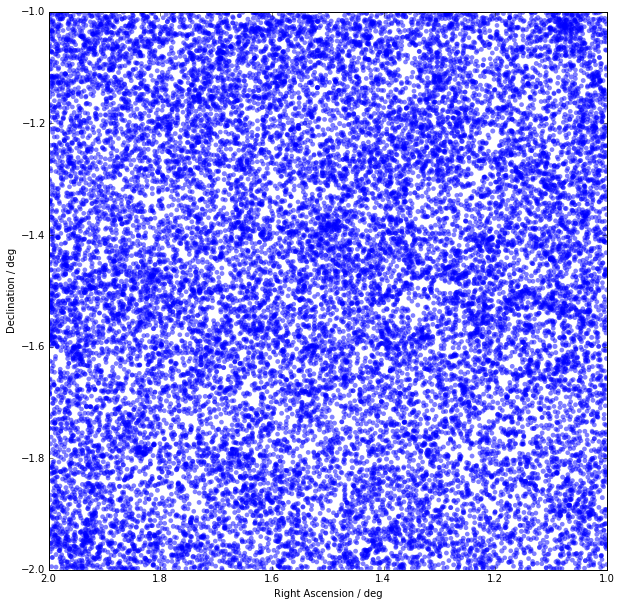

In [21]:
f.plotForeground(10,[0,23])

In [19]:
config = Configuration(PANGLOSS_DIR+'/example/example.config')
g = Catalog(PANGLOSS_DIR+'/data/GGL_los_8_0_0_0_0_N_4096_ang_4_Guo_galaxies_on_plane_27_to_63.images.txt',config)

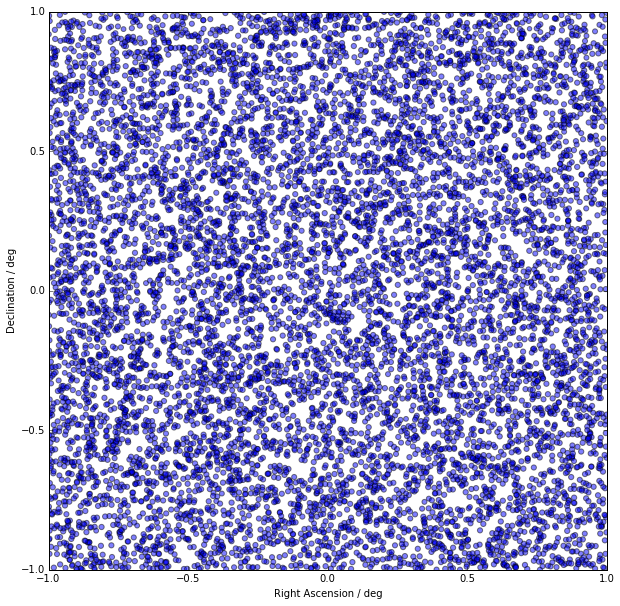

In [20]:
domain = None
N = 10000
mag_cut = [24,0]
mass_cut = [10**5,10**12]
z_cut = [0,1.3857]
plot = True
g.generate(domain,N,mag_cut,mass_cut,z_cut,plot)

In [8]:
pangloss.plot.plotCatalogOnMap(f,fig_size=15,subplot=[2,1.5,-2,-1.5],mass_cutoff=[10**11,10**12],z_cutoff=[0,1.3857])
#K.plot(fig_size=15,subplot=[2,1.5,-2,-1.5])
#S.plot(fig_size=15,subplot=[2,1.5,-2,-1.5])

NameError: name 'f' is not defined

('max ra: ', 1.6323624879056666, 'min ra: ', 1.531917256841282, 'max dec: ', -1.5304791327755036, 'min dec: ', -1.6046198714654323)
('min pix_ra: ', 376.96081238459738, 'max pix_ra: ', 479.81672899452724, 'min pix_dec: ', 404.36925161939735, 'max pix_dec: ', 480.28936803788429)


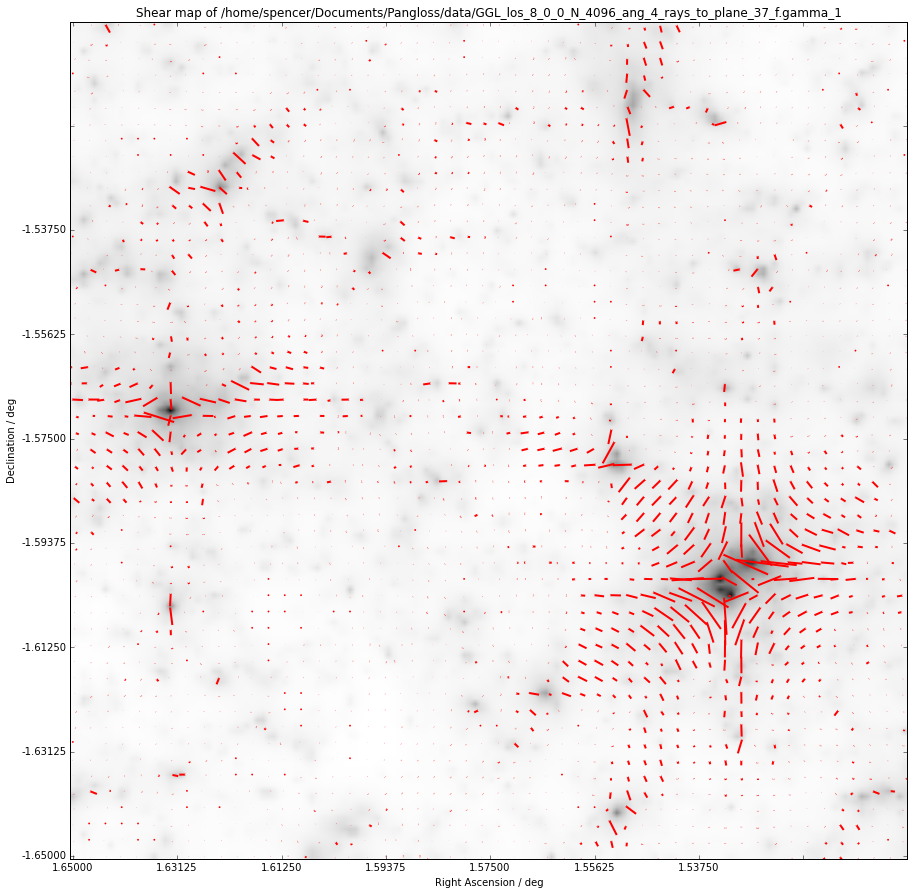

In [76]:
pangloss.plot.plotCatalogOnMap(f,fig_size=15,subplot=[1.65,1.5,-1.65,-1.5],mass_cutoff=[10**11,10**12],z_cutoff=[0,1.3857])

In [32]:
f.data['nRA'][(-f.data['nRA']>np.deg2rad(1)) & (-f.data['nRA'] < np.deg2rad(2))]

-0.0315972
-0.0308723
-0.0307657
-0.0306269
-0.0307691
-0.0312818
-0.0312742
-0.0305786
-0.0315302
-0.0306328
-0.030625


In [25]:
max(-f.data['nRA'])

0.034897999999999998

(1.9995081134475468, 1.0000004285756798)
[1.9995081134475468, 1.0000004285756798]


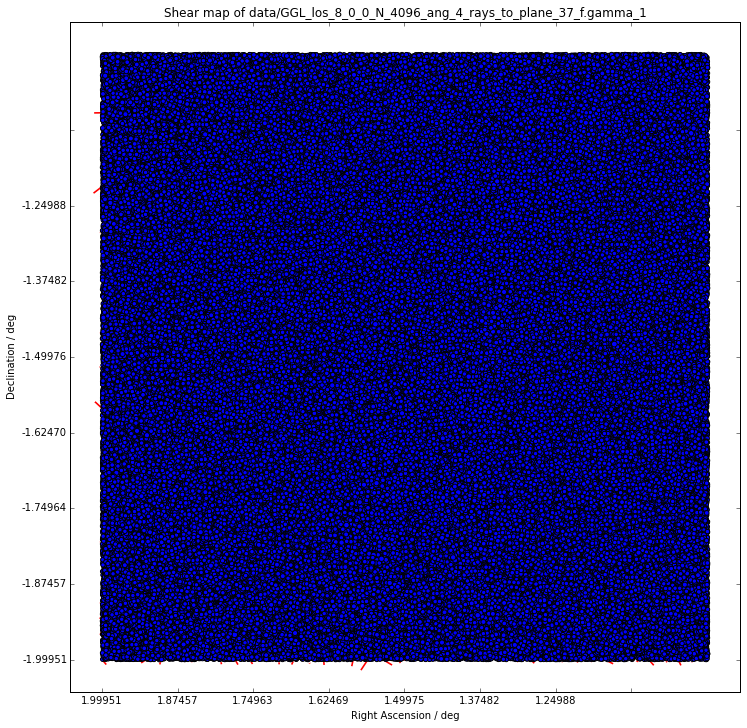

In [62]:
pangloss.plot.plotCatalogOnMap(f,12,None,[0,26],[0,10**20],[0,1.3857])

In [12]:
np.log10(min(f.data['Mstar_obs']))

5.5259060594508371

In [23]:
np.log10(max(f.data['Mstar_obs']))

11.676770404385277

In [25]:
np.log10(np.mean(f.data['Mstar_obs']))

9.8055552901901084

In [78]:
plt.gcf().__dict__

{'_agg_filter': None,
 '_alpha': None,
 '_animated': False,
 '_axobservers': [],
 '_axstack': <matplotlib.figure.AxesStack at 0x7f5a5d08c2d0>,
 '_cachedRenderer': None,
 '_clipon': True,
 '_clippath': None,
 '_contains': None,
 '_dpi': 80.0,
 '_gid': None,
 '_hold': True,
 '_label': u'',
 '_lod': False,
 '_oid': 0,
 '_path_effects': [],
 '_picker': None,
 '_propobservers': {},
 '_rasterized': None,
 '_remove_method': None,
 '_sketch': None,
 '_snap': None,
 '_suptitle': None,
 '_tight': False,
 '_tight_parameters': {},
 '_transform': None,
 '_transformSet': False,
 '_url': None,
 '_visible': True,
 'artists': [],
 'bbox': TransformedBbox(Bbox('array([[ 0.,  0.],\n       [ 6.,  4.]])'), Affine2D(array([[ 80.,   0.,   0.],
        [  0.,  80.,   0.],
        [  0.,   0.,   1.]]))),
 'bbox_inches': Bbox('array([[ 0.,  0.],\n       [ 6.,  4.]])'),
 'callbacks': <matplotlib.cbook.CallbackRegistry instance at 0x7f5a3dce93b0>,
 'canvas': <matplotlib.backends.backend_agg.FigureCanvasAgg at 0x7

Convergence
(-0.5, 4095.5, -0.5, 4095.5)


{'_agg_filter': None,
 '_alpha': None,
 '_animated': False,
 '_axobservers': [],
 '_axstack': <matplotlib.figure.AxesStack at 0x7fd985340a50>,
 '_cachedRenderer': None,
 '_clipon': True,
 '_clippath': None,
 '_contains': None,
 '_dpi': 80.0,
 '_gid': None,
 '_hold': True,
 '_label': u'Convergence',
 '_lod': False,
 '_oid': 0,
 '_path_effects': [],
 '_picker': None,
 '_propobservers': {},
 '_rasterized': None,
 '_remove_method': None,
 '_sketch': None,
 '_snap': None,
 '_suptitle': None,
 '_tight': False,
 '_tight_parameters': {},
 '_transform': None,
 '_transformSet': False,
 '_url': None,
 '_visible': True,
 'artists': [],
 'bbox': TransformedBbox(Bbox('array([[  0.,   0.],\n       [ 10.,  10.]])'), Affine2D(array([[ 80.,   0.,   0.],
        [  0.,  80.,   0.],
        [  0.,   0.,   1.]]))),
 'bbox_inches': Bbox('array([[  0.,   0.],\n       [ 10.,  10.]])'),
 'callbacks': <matplotlib.cbook.CallbackRegistry instance at 0x7fd98549d878>,
 'canvas': <matplotlib.backends.backend_agg.Fig

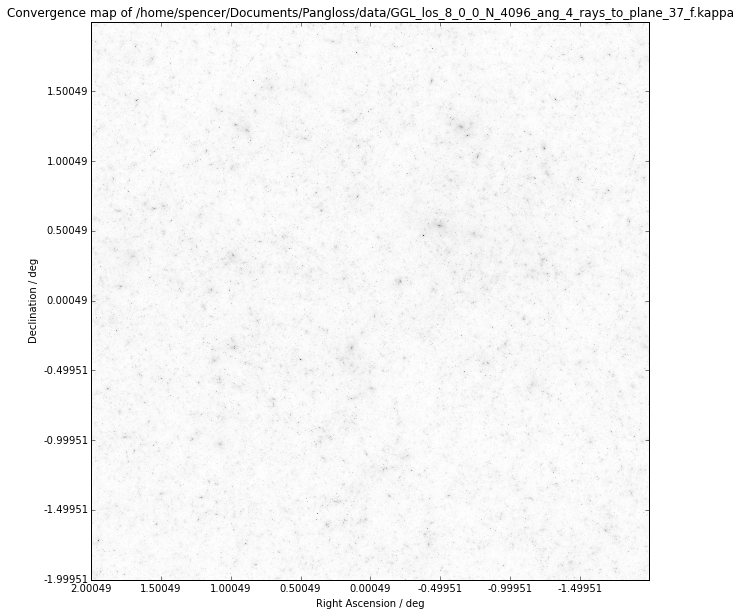

In [9]:
K.plot()
plt.gcf().__dict__